In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from Misc.Functions.Plots import *

from Misc.Functions.DataProduction import *

from Misc.Functions.SupportingFunctions import *

import warnings
warnings.filterwarnings('ignore')


run_list=[285490,286498,287987,288543,289413,289733,291970,293528]
# run_list=[285490,286498,287987,288543,289413,289733,291970,293528]
color_list_=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:olive','tab:cyan']
from scipy.special import kl_div,softmax

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm



dataProduction=dataProd()
mix_=dataProduction.multipleRun(285490,286498,287987,288543,289413,289733,291970,293528)
mix=mix_.copy()
pedestalOnly=pd.DataFrame(index=np.arange(18)+1)
planes_list=['UTaX', 'UTaU', 'UTbV', 'UTbX']

for i,v in enumerate(run_list):
    for plane in planes_list:
        temp_=mix[v].loc[(mix[v,'Plane']==plane)][['Side','Position','PedestalValue']]
        temp_['Stave']=temp_['Side']+temp_['Position'].astype(str)
        temp_.drop(['Side','Position'],axis=1,inplace=True)
        pedestalOnly[['Stave','Run'+str(i+1)+'_'+plane]]=temp_.groupby(['Stave']).agg('mean')['PedestalValue'].reset_index()




pedestalOnly_=pedestalOnly.drop(['Stave'],axis=1).fillna(0)

probabilities_=pd.DataFrame(softmax(pedestalOnly_),columns=pedestalOnly_.columns,index=np.arange(18)+1)
probabilities_

,Run1_UTaX,Run1_UTaU,Run1_UTbV,Run1_UTbX,Run2_UTaX,Run2_UTaU,Run2_UTbV,Run2_UTbX,Run3_UTaX,Run3_UTaU,...,Run6_UTbV,Run6_UTbX,Run7_UTaX,Run7_UTaU,Run7_UTbV,Run7_UTbX,Run8_UTaX,Run8_UTaU,Run8_UTbV,Run8_UTbX
1,0.000830,0.000854,0.001180,0.000964,0.000820,0.001136,0.001239,0.000579,0.000917,0.000961,...,0.001163,0.000673,0.000828,0.001288,0.001332,0.000616,0.017624,0.008705,0.023592,0.005205
2,0.001120,0.001073,0.001012,0.001018,0.000858,0.000792,0.000765,0.000698,0.000453,0.000512,...,0.001257,0.001176,0.001188,0.000891,0.000927,0.001111,0.001028,0.000625,0.001259,0.000974
3,0.001319,0.001247,0.001201,0.001419,0.000795,0.000714,0.000530,0.000652,0.000653,0.000574,...,0.001197,0.001306,0.001004,0.000877,0.000954,0.000942,0.000870,0.000897,0.000797,0.000606
4,0.001427,0.001167,0.001213,0.001691,0.000779,0.000728,0.000524,0.000774,0.000595,0.000649,...,0.001137,0.001741,0.001174,0.000888,0.000863,0.001119,0.000940,0.000610,0.000872,0.000992
5,0.001667,0.001625,0.001622,0.001623,0.000535,0.000627,0.000698,0.000875,0.000400,0.000429,...,0.001508,0.001611,0.000964,0.000853,0.000872,0.001215,0.000553,0.000632,0.000819,0.001659
6,0.001269,0.001200,0.001119,0.018724,0.000663,0.000670,0.000719,0.000725,0.000558,0.000567,...,0.001197,0.001256,0.000912,0.000913,0.000959,0.000984,0.000490,0.001039,0.000725,0.000744
7,0.001673,0.001090,0.001105,0.001546,0.000717,0.000673,0.000536,0.000688,0.000572,0.000744,...,0.001171,0.001583,0.001260,0.001029,0.000875,0.001320,0.003172,0.000857,0.000871,0.001987
8,0.000998,0.001199,0.001500,0.001451,0.000975,0.001383,0.000601,0.000636,0.000889,0.001110,...,0.001340,0.001217,0.000962,0.001453,0.000969,0.001040,0.002038,0.027168,0.000650,0.000475
9,0.000910,0.000933,0.001102,0.001043,0.000655,0.001054,0.001241,0.001030,0.000741,0.000890,...,0.001460,0.001139,0.000737,0.001280,0.001322,0.001005,0.011611,0.023990,0.038758,0.020343
10,0.001309,0.001170,0.000832,0.000865,0.000835,0.000689,0.001048,0.000653,0.000577,0.000533,...,0.001360,0.000686,0.000962,0.000921,0.001340,0.000727,0.000329,0.000554,0.022216,0.208594


<Axes: >

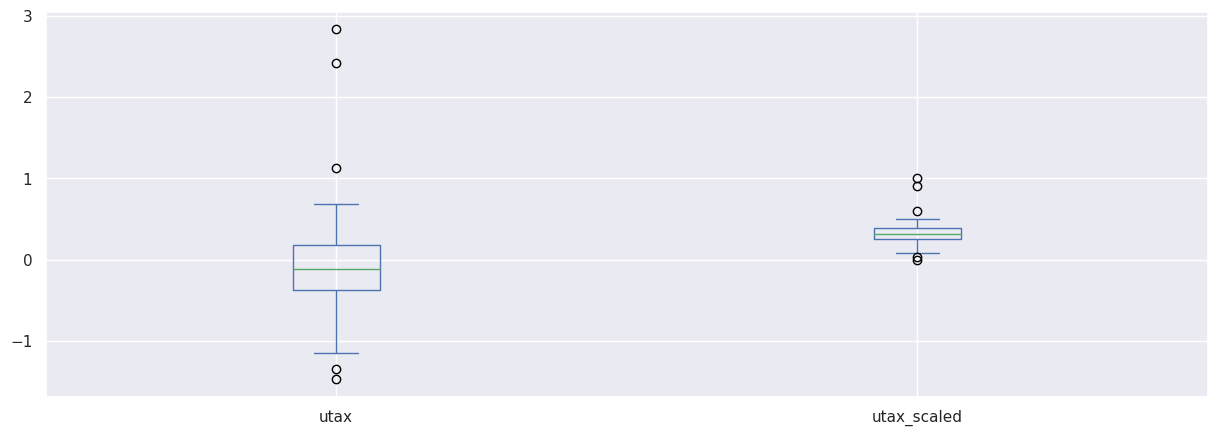

In [2]:
utax_=pedestalOnly_[pedestalOnly_.filter(regex='UTaX').columns]
utax=utax_.values.flatten()
ts=pd.DataFrame(index=np.arange(144))
ts['utax']=utax
ts=ts[ts['utax']!=0]
# ts=np.abs(ts)

from sklearn.preprocessing import RobustScaler,MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


# Fit and transform the data
ts['utax_scaled'] = scaler.fit_transform(ts[['utax']])
ts.plot(kind='box')

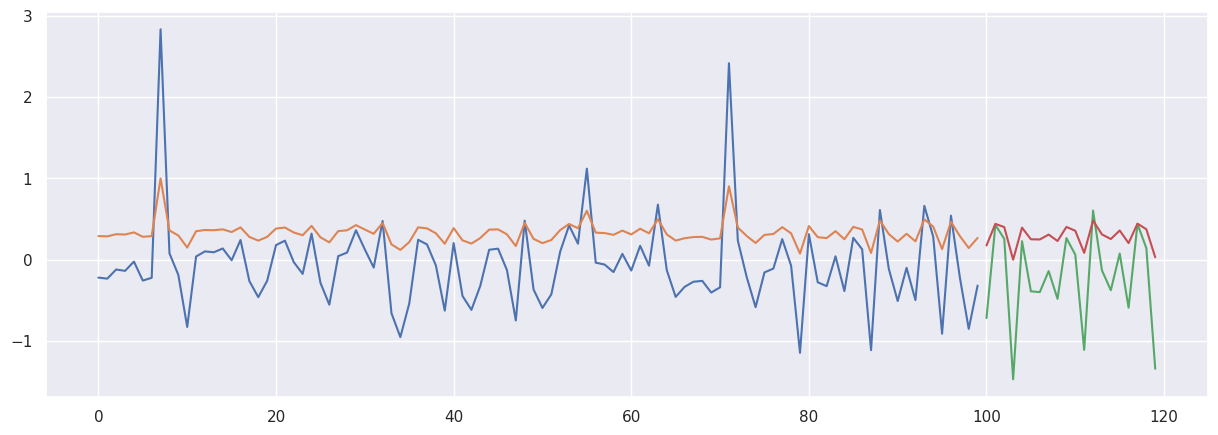

In [3]:
train=ts.head(100)
test=ts.tail(20)

plt.plot(train)
plt.plot(test)

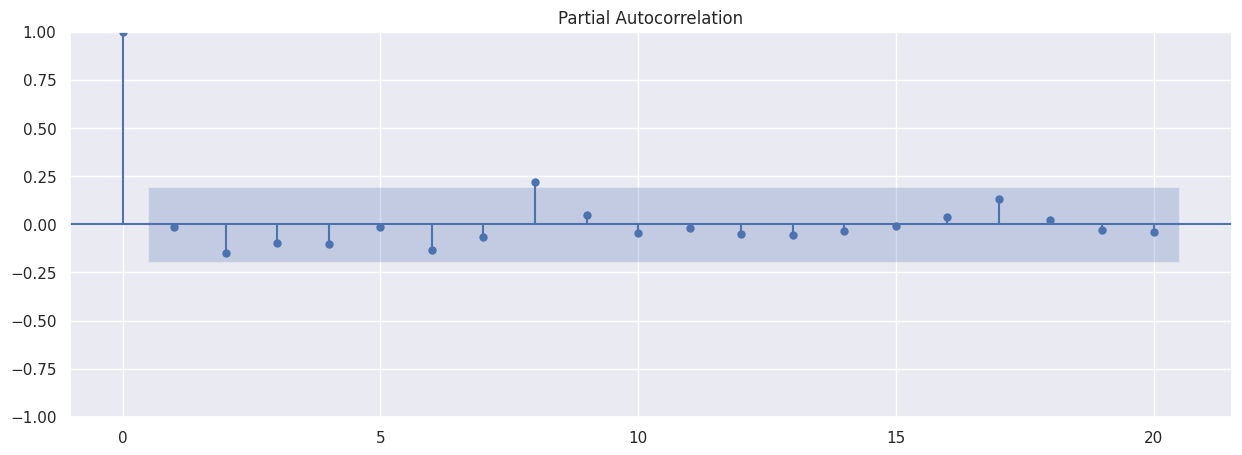

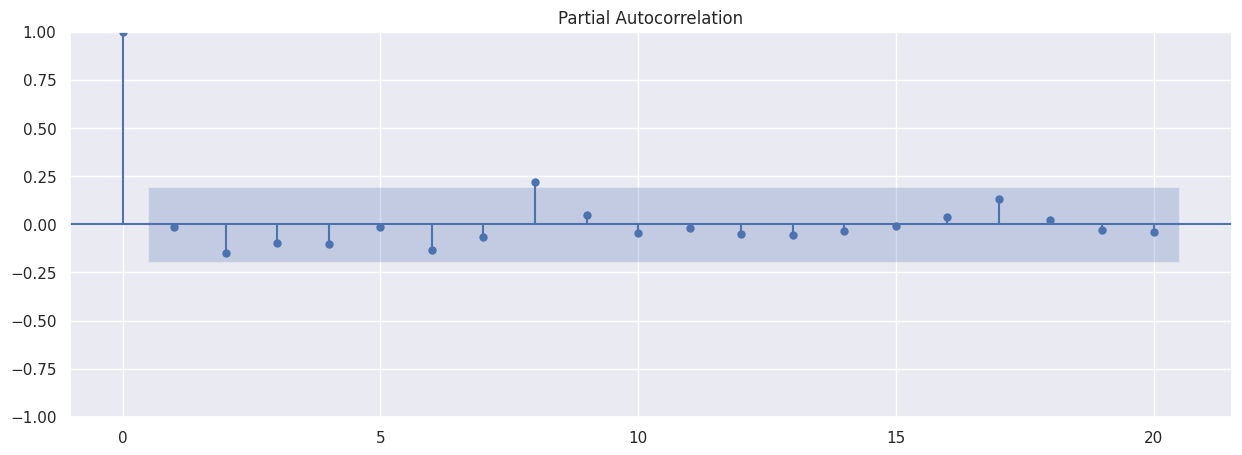

In [4]:
#finding I
plot_pacf(train['utax_scaled'])

In [5]:
#Looping for the parameters.
from sklearn.metrics import mean_squared_error
import numpy as np

d=0
loss=[]
for p in range(15):
    for q in range(10):

        model = ARIMA(train['utax_scaled'], order=(p,d,q))  # Example order, typically chosen through model selection criteria
        model_fit = model.fit()

        # Summary of the model
        # print(model_fit.summary())
        forecast = model_fit.forecast(steps=20)  # Forecasting next 12 periods (1 year)
        # print(forecast)

        loss_=np.sqrt(mean_squared_error(test['utax_scaled'],forecast))
        loss.append((p, d, q, loss_))

        # plt.title(f"[P = {p}, D = {d}, Q = {q}]")
        # plt.plot(train.index, train, label='Train')
        # plt.plot(test.index, test, label='Test')
        # plt.plot(test.index, forecast, label='Forecast')
        # plt.legend()
        # plt.show()


/home/hashmi/miniconda3/envs/box/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashmi/miniconda3/envs/box/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashmi/miniconda3/envs/box/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashmi/miniconda3/envs/box/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashmi/miniconda3/envs

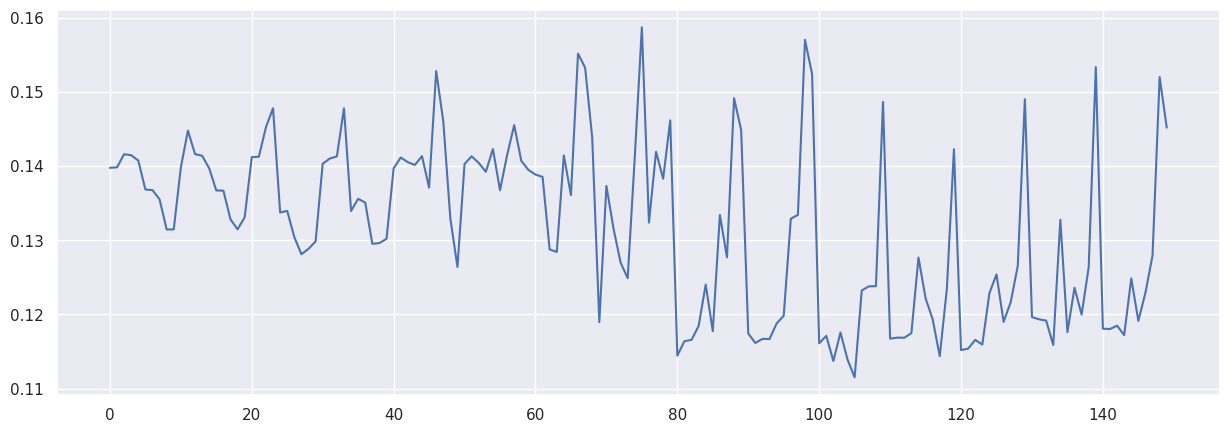

In [6]:
lossData=pd.DataFrame(loss,columns=['p','d','q','loss'])
lossData
plt.plot(lossData['loss'])

In [7]:
import plotly.graph_objects as go

# Create an interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=lossData['loss'],
    mode='lines',
    name='Loss'
))

fig.update_layout(
    title='Model Loss Over Time',
    xaxis_title='Epoch',
    yaxis_title='Loss'
)

# Show the plot
fig.show()


In [8]:
lossData.sort_values(by='loss').head(20)

,p,d,q,loss
105,10,0,5,0.111525
102,10,0,2,0.113722
104,10,0,4,0.113900
117,11,0,7,0.114382
80,8,0,0,0.114449
120,12,0,0,0.115193
121,12,0,1,0.115392
133,13,0,3,0.115880
123,12,0,3,0.115934
100,10,0,0,0.116110


/home/hashmi/miniconda3/envs/box/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



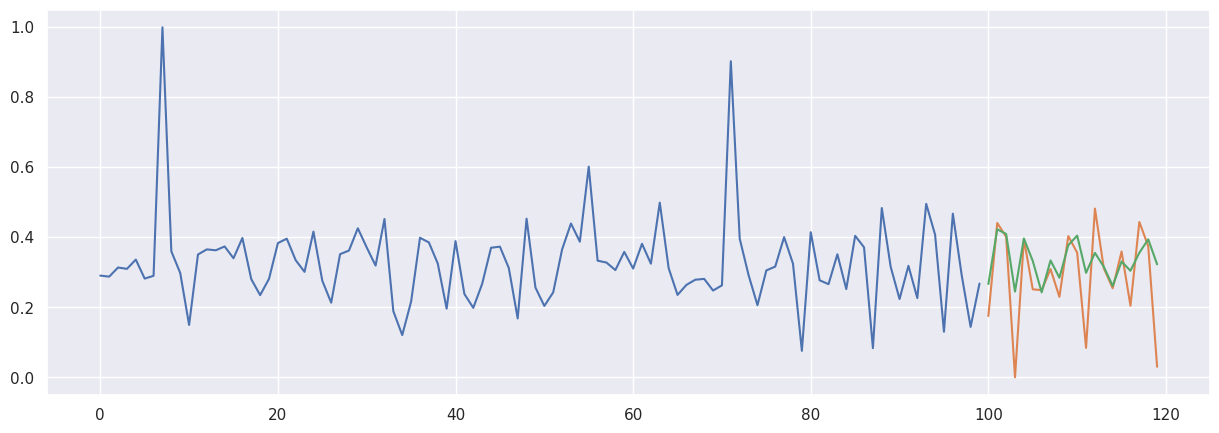

In [9]:
model = ARIMA(train['utax_scaled'], order=(10,0,5))  # Example order, typically chosen through model selection criteria
model_fit = model.fit()

# Summary of the model
# print(model_fit.summary())
forecast = model_fit.forecast(steps=20)  # Forecasting next 12 periods (1 year)
# print(forecast)

plt.plot(train['utax_scaled'])
plt.plot(test['utax_scaled'])
plt.plot(forecast)
